### Assignment 3 - Sentiment Analysis

#### by Peter Thramkrongart & Jakub Raszka
DESCRIPTION

Dictionary-based sentiment analysis with Python


https://www.kaggle.com/therohk/million-headlines



This is a dataset of over a million headlines taken from the Australian news source ABC (Start Date: 2003-02-19 ; End Date: 2020-12-31).



Calculate the sentiment score for every headline in the data. You can do this using the spaCyTextBlob approach that we covered in class or any other dictionary-based approach in Python.
Create and save a plot of sentiment over time with a 1-week rolling average
Create and save a plot of sentiment over time with a 1-month rolling average
Make sure that you have clear values on the x-axis and that you include the following: a plot title; labels for the x and y axes; and a legend for the plot
Write a short summary (no more than a paragraph) describing what the two plots show. You should mention the following points: 1) What (if any) are the general trends? 2) What (if any) inferences might you draw from them?


General instructions

For this assignment, you should upload a standalone .py script which can be executed from the command line or a Jupyter Notebook
Save your script as sentiment.py or sentiment.ipynb
Make sure to include a requirements.txt file and details about where to find the data
You can either upload the scripts here or push to GitHub and include a link - or both!
Your code should be clearly documented in a way that allows others to easily follow the structure of your script and to use them from the command line


Purpose

This assignment is designed to test that you have a understanding of:

how to perform dictionary-based sentiment analysis in Python;
how to effectively use pandas and spaCy in a simple NLP workflow;
how to present results visually, working with datetime formats to show trends over time

__Importing modules & data__

In [10]:
import os #For creating paths
import pandas as pd #for dataframes
import matplotlib.pyplot as plt  #for plots
import spacy # for nlp pipeline
from spacytextblob.spacytextblob import SpacyTextBlob  #For sentiment analysis
import time #for timing calculations
from tqdm import tqdm
# initialise spacy
nlp = spacy.load("en_core_web_sm")  #load spacy language model
spacy_text_blob = SpacyTextBlob()  ##initiate textblob instance
nlp.add_pipe(spacy_text_blob) ## add to nlp pipeline

In [6]:
data_path = os.path.join("..", "data", "raw", "abcnews-date-text.csv") #path to data
data = pd.read_csv(data_path) # read data

__Date format & Sentiment scores__

In [14]:
data['publish_date'] = pd.to_datetime(data.publish_date, format="%Y%m%d") ##convert variable to datetime format
data = data.sample(50000) # sample 50000 random headlines

In [15]:
data = data.sort_values("publish_date") #sort data

In [16]:
start_time = time.time() #get timestamp

senti_list = [] #empty list for sentiment socres

for headline in tqdm(data.headline_text): #for each headline...
    doc = nlp(headline)  #process headline
    score = doc._.sentiment.polarity #extract sentiment score
    senti_list.append(score) #append to list

print(f"Time elapsed: {time.time()-start_time}")  #print elapsed time
    

100%|██████████| 100/100 [00:59<00:00,  1.69it/s]

Time elapsed: 59.03717017173767


In [17]:
# appending list with the sentiment score into pandas dataframe
data["sentiment"] = senti_list

__Calculating mean, variance over a week, month__

In [18]:
# calculating mean per week, month
data_week_mean = data.resample("W",on ="publish_date").mean()
data_month_mean = data.resample("M",on ="publish_date").mean()

# calculating variance per week, month
data_week_var = data.resample("W",on ="publish_date").var()
data_month_var = data.resample("M",on ="publish_date").var()

__Plotting__

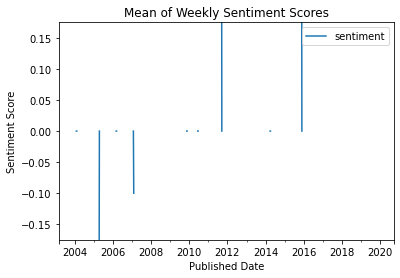

In [19]:
week_plot_mean = data_week_mean.plot(
    ylabel = "Sentiment Score",
    xlabel = "Published Date",
    ylim = (-0.175,0.175), #set axis limits
    title = "Mean of Weekly Sentiment Scores")

#save plot
fig_week_mean = week_plot_mean.get_figure()
fig_week_mean.savefig(os.path.join("..", "data", "week_plot_mean"))



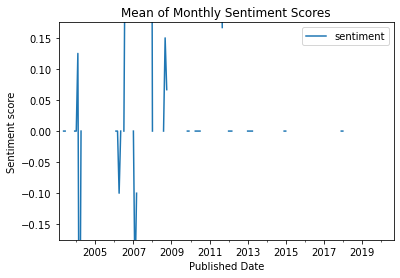

In [20]:
month_plot_mean = data_month_mean.plot(
    ylabel = "Sentiment score",
    xlabel = "Published Date",
     ylim = (-0.175,0.175),
    title = "Mean of Monthly Sentiment Scores")


fig_month_mean = month_plot_mean.get_figure()
fig_month_mean.savefig(os.path.join("..", "data", "month_plot_mean"))


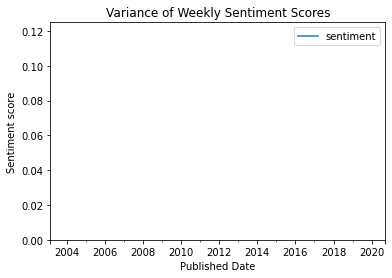

In [21]:
week_plot_var = data_week_var.plot(
    ylabel = "Sentiment score",
    xlabel = "Published Date",
    ylim = (0,0.125),
    title = "Variance of Weekly Sentiment Scores")

fig_week_var = week_plot_var.get_figure()
fig_week_var.savefig(os.path.join("..", "data", "week_plot_var"))

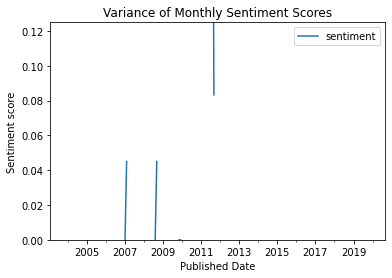

In [22]:
month_plot_var = data_month_var.plot(
    ylabel = "Sentiment score",
    xlabel = "Published Date",
    ylim = (0,0.125),
    title = "Variance of Monthly Sentiment Scores")




fig_month_var = month_plot_var.get_figure()
fig_month_var.savefig(os.path.join("..", "data", "month_plot_var"))

__What can we infer?__

From the mean plots, we can see that headline on average tend to be slightly more positive than negative over the whole period.
We see much more varianve between measurements when comparing weekly scores to monthly scores. We suspect this may decrease with a larger sample size. From 2019 and onwards there seem tobe a slight increase in positive sentiments, and a decrease in variance, but that may be an artefact of sampling less than 5% of the data.